In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

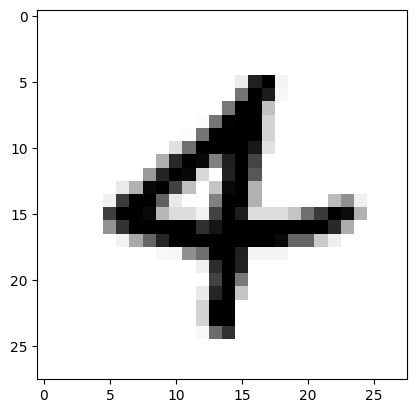

label 4


In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[150],cmap="gray_r")
plt.show()
print("label",y_train[150])

In [4]:
for row in x_train[150]:
  for i in row:
    print(f"%3s" %i,end="")
  print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19221254 11  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0139253227  8  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0135254253 63  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  4138252254253 44  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  3138253253254253 44  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 31144253253253254230 29  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 80216253247127224254187  0  0  0  0  

# preparing the data for the model process.

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(60000,28,28,1)  # We have black and white images
x_test = x_test.reshape(10000,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_train.dtype

dtype('uint8')

In [8]:
# changing type
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train.dtype

dtype('float32')

In [9]:
# normalization

x_train = x_train /255
x_test = x_test / 255

In [10]:
# encoding

y_train,y_train.shape

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8), (60000,))

In [11]:
y_train[0]

5

In [12]:
from keras.utils import to_categorical

y_train= to_categorical(y_train,10)   # we have 10 classes
y_test = to_categorical(y_test,10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
# validation dataset
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=0)

# model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [15]:
model = Sequential()

# cnn
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# düzleşirme
model.add(Flatten())

# dl
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="sigmoid"))  # 10 classes

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

result = model.fit(x_train,y_train,validation_data =(x_val,y_val),epochs=10,batch_size=128,verbose=0)

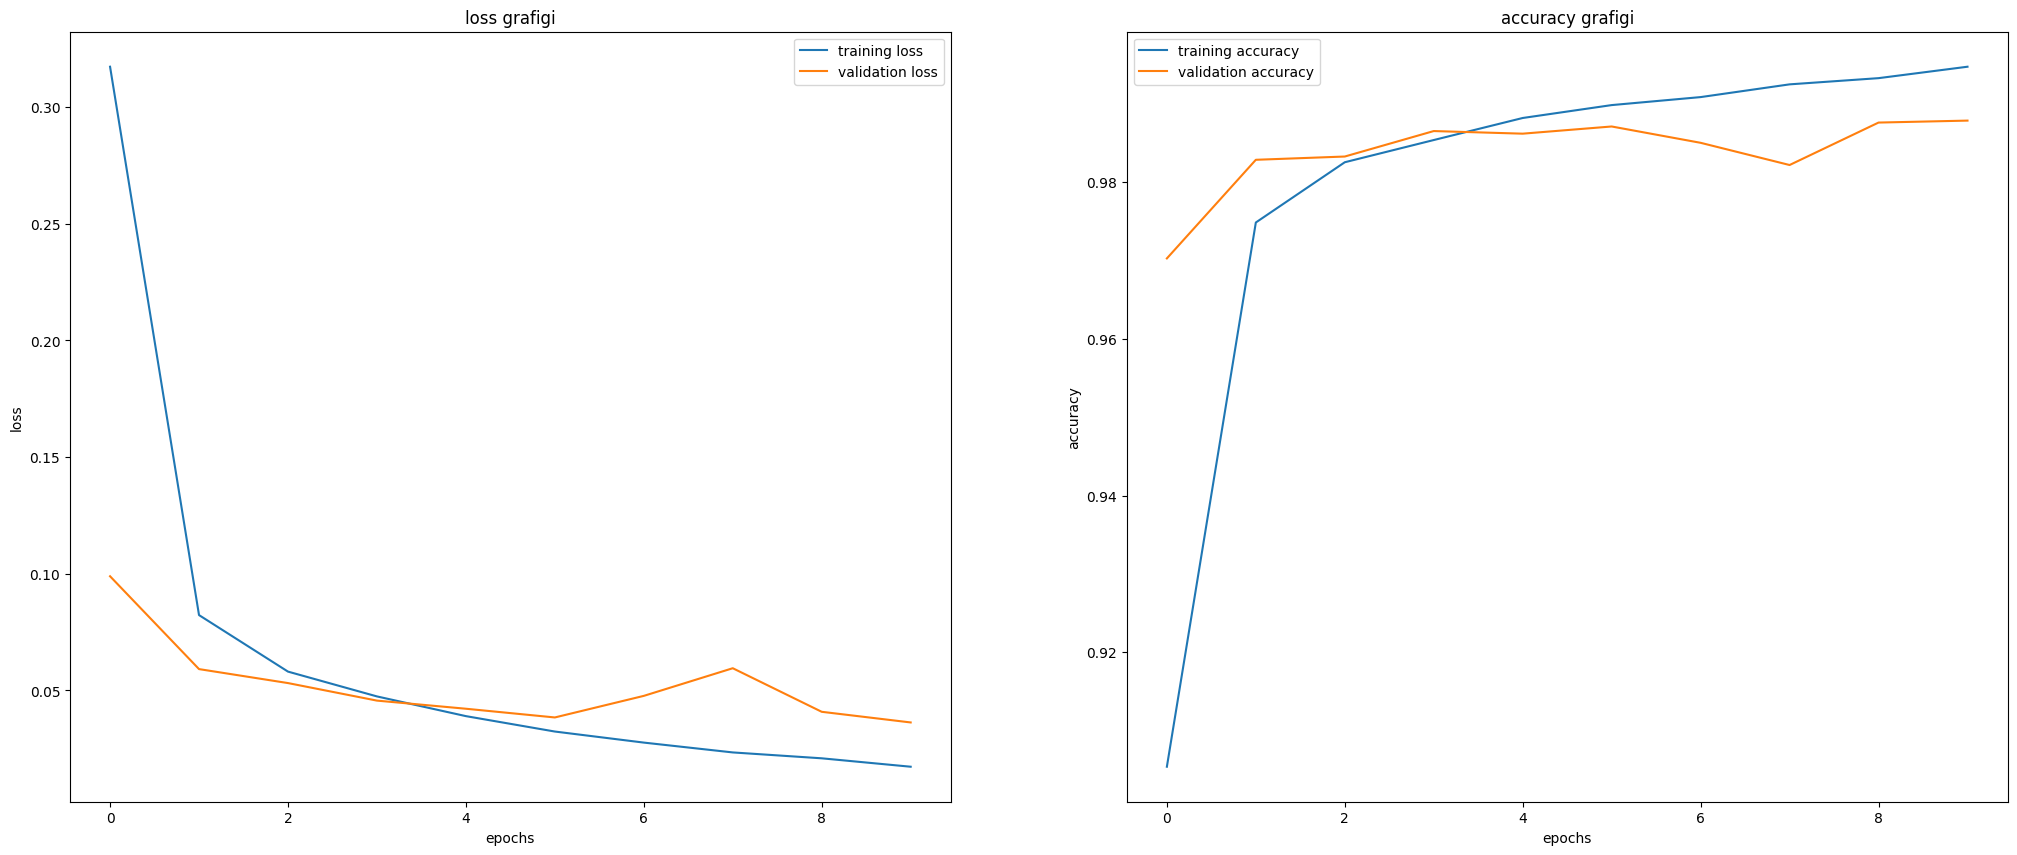

In [16]:
fig,ax = plt.subplots(1,2,figsize=(25,10))

ax[0].plot(result.history["loss"],label="training loss")
ax[0].plot(result.history["val_loss"],label="validation loss")
ax[0].set_title("loss")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("loss")
ax[0].legend()

ax[1].plot(result.history["accuracy"],label="training accuracy")
ax[1].plot(result.history["val_accuracy"],label="validation accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("accuracy")
ax[1].legend()

plt.show()

# Hyperparameter optimization

# keras tuner

In [17]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [20]:
import kerastuner as kt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.regularizers import L2
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

In [22]:
def build_model(hp):
    model = Sequential()

    # cnn layer 1
    model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
    model.add(BatchNormalization())

    # cnn layer 2
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), kernel_size=(3,3), activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(hp.Int("conv_1_pooling_strides",min_value=1,max_value=2, step=1)),padding="same"))
    model.add(Dropout(rate=hp.Float('dropout_1_rate', min_value=0.0, max_value=0.5, step=0.1)))

    # cnn layer 3
    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=32), kernel_size=(3,3), activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_2_rate', min_value=0.0, max_value=0.5, step=0.1)))

    # cnn layer 4
    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16), kernel_size=(3,3), activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=(hp.Int("conv_3_pooling_strides",min_value=1,max_value=2, step=1))))
    model.add(Dropout(rate=hp.Float('dropout_3_rate', min_value=0.0, max_value=0.5, step=0.1)))

    # vectorization
    model.add(Flatten())

    # dense layer 1
    model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16), activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_1_rate', min_value=0.0, max_value=0.5, step=0.1)))

    # dense layer 2
    model.add(Dense(units=hp.Int('dense_2_units', min_value=32, max_value=64, step=8), activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_2_rate', min_value=0.0, max_value=0.1, step=0.1)))

    # dense layer 3
    model.add(Dense(units=hp.Int('dense_3_units', min_value=8, max_value=16, step=8), activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_3_rate', min_value=0.0, max_value=0.2, step=0.1)))

    # dense output layer
    model.add(Dense(10, activation="sigmoid"))  # 10 classes

    # learning_rate optimization
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[0.01, 0.1]))
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[early_stopping])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hps)


Trial 30 Complete [00h 02m 15s]
val_accuracy: 0.9920833110809326

Best val_accuracy So Far: 0.9934166669845581
Total elapsed time: 00h 40m 06s


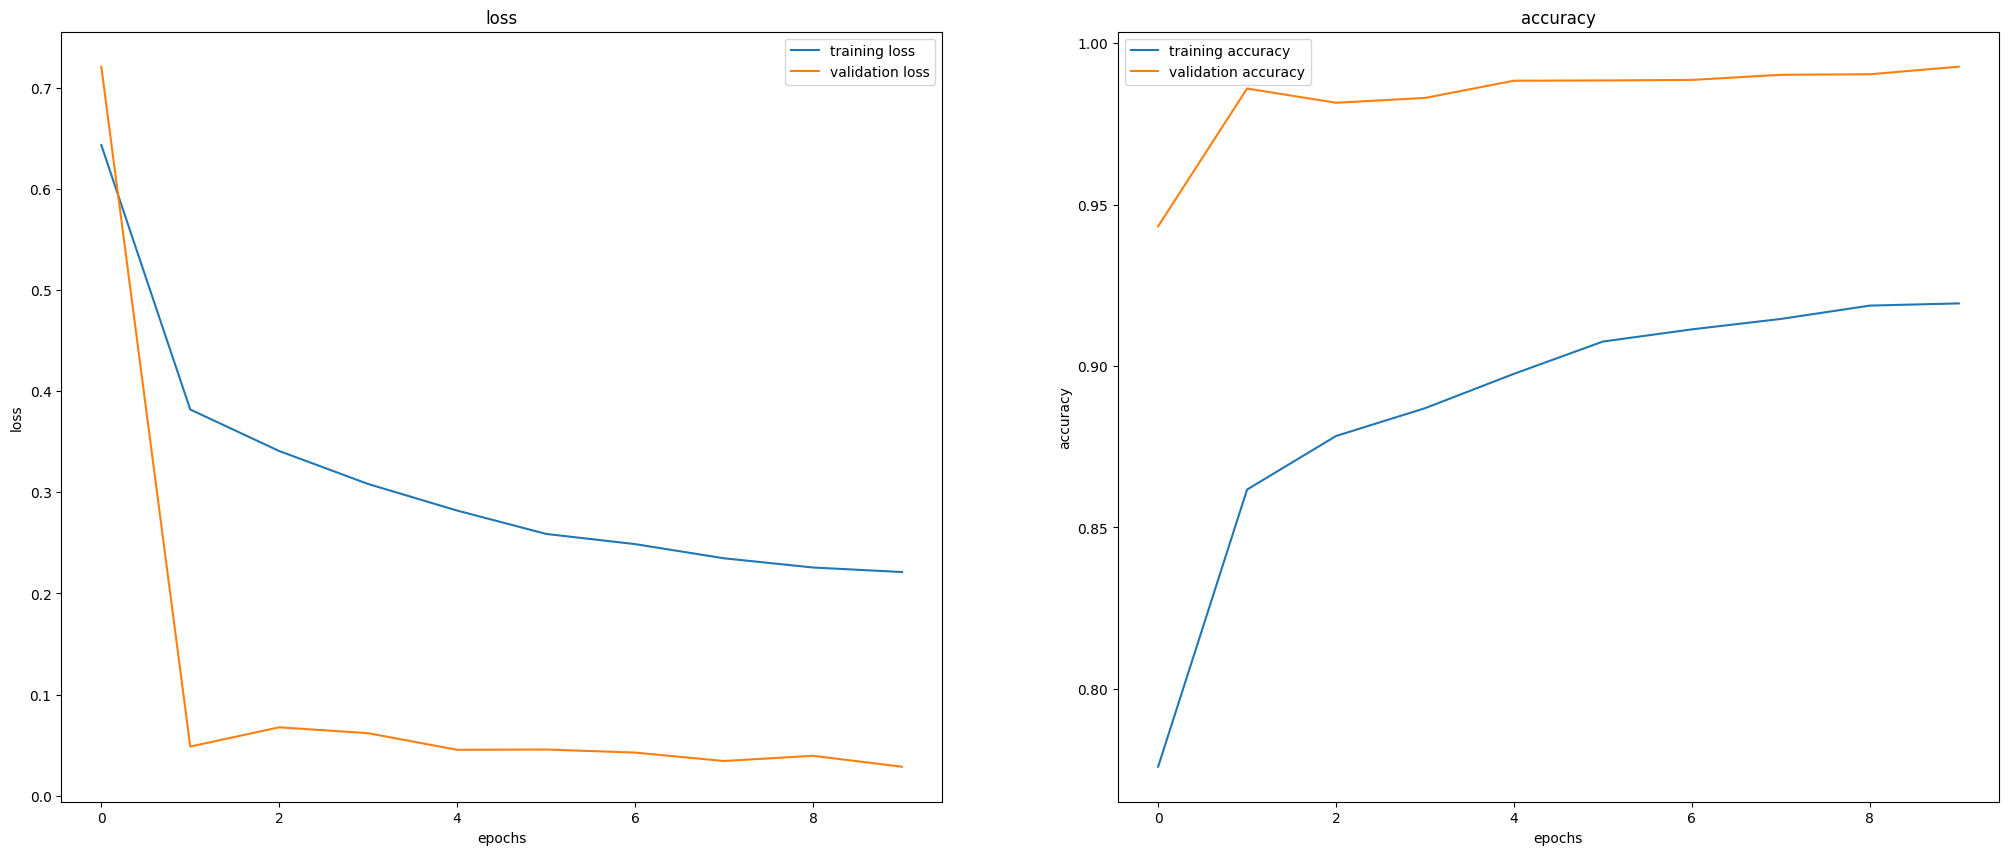

In [23]:
# best model
best_model = build_model(best_hps)


result = best_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, verbose=0)

# visualization
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].plot(result.history["loss"], label="training loss")
ax[0].plot(result.history["val_loss"], label="validation loss")
ax[0].set_title("loss")
ax[0].set_ylabel("loss")
ax[0].set_xlabel("epochs")
ax[0].legend()

ax[1].plot(result.history["accuracy"], label="training accuracy")
ax[1].plot(result.history["val_accuracy"], label="validation accuracy")
ax[1].set_title("accuracy")
ax[1].set_ylabel("accuracy")
ax[1].set_xlabel("epochs")
ax[1].legend()

plt.show()

# saving the model

In [25]:
model.save("/content/drive/MyDrive/modelim.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# using the model

In [26]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# preparing test dataset
x_test = x_test.reshape(10000,28,28,1)
x_test = x_test.astype("float32")/255

from keras.models import load_model
model = load_model("/content/drive/MyDrive/modelim.h5")  # import model

y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


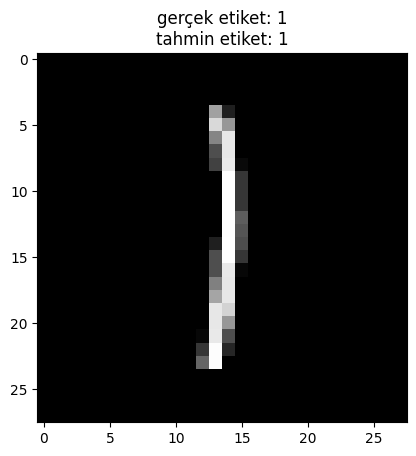

In [30]:
import numpy as np
i = 40
plt.imshow(x_test[i].reshape(28,28),cmap="gray")
plt.title("gerçek etiket: {}\ntahmin etiket: {}".format(y_test[i],np.argmax(y_pred[i])))
plt.show()

In [32]:
predicted_classes = np.argmax(y_pred,axis=1)
accuracy = np.mean(predicted_classes == y_test)
print(f"accuracy score:{accuracy}")

accuracy score:0.9892
